# Wikipathways Worm 2018

Author: Zachary Flamholz  
Date: 07-2018  
Database: https://www.wikipathways.org/    
Data: http://data.wikipathways.org/20180610/gpml/wikipathways-20180610-gpml-Caenorhabditis_elegans.zip v. 20180610 (10 June 2018)           
Companion file: http://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Invertebrates/Caenorhabditis_elegans.gene_info.gz    

## import libraries

In [1]:
import numpy as np
import pandas as pd
import sys, datetime
import scipy.stats as stat
import matplotlib
from matplotlib import pyplot as py

# Versions of Modules in use

In [2]:
%load_ext version_information
%version_information numpy, pandas

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.5
pandas 0.23.1
Tue Jul 10 11:20:32 2018 EDT

## read in data 

In [3]:
df = pd.read_csv('input/wikipathways_Celegans_2018', sep = '~', header=None)

In [4]:
df.head()

,0
0,Cell engulfment%WikiPathways_20180610%WP2226%C...
1,Proteasome Degradation%WikiPathways_20180610%W...
2,"Valine, leucine and isoleucine degradation%Wik..."
3,"RTK/Ras/MAPK - LET-23, EGL-15 independent%Wik..."
4,Triacylglyceride Synthesis%WikiPathways_201806...


In [5]:
df.iloc[0]

0    Cell engulfment%WikiPathways_20180610%WP2226%C...
Name: 0, dtype: object

In [6]:
cElegans_geneInfo = pd.read_csv("input/Caenorhabditis_elegans.gene_info-1", sep="\t")

## load NCBI reference for converting ENTREZ gene ID to gene symbol

In [7]:
cElegans_geneInfo.head()

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,6239,171590,homt-1,CELE_Y74C9A.3,-,WormBase:WBGene00022277,I,-,Alpha N-terminal protein methyltransferase 1,protein-coding,-,-,-,Alpha N-terminal protein methyltransferase 1,20180606,-
1,6239,171591,nlp-40,CELE_Y74C9A.2,-,WormBase:WBGene00022276,I,-,Peptide P4,protein-coding,-,-,-,Peptide P4,20180606,-
2,6239,171592,rcor-1,CELE_Y74C9A.4,-,WormBase:WBGene00022278,I,-,RCOR (REST CO-Repressor) homolog,protein-coding,-,-,-,RCOR (REST CO-Repressor) homolog,20180606,-
3,6239,171593,sesn-1,CELE_Y74C9A.5,-,WormBase:WBGene00022279,I,-,Sestrin homolog,protein-coding,-,-,-,Sestrin homolog,20180606,-
4,6239,171594,pgs-1,CELE_Y48G1C.4,-,WormBase:WBGene00021677,I,-,CDP-diacylglycerol--glycerol-3-phosphate 3-pho...,protein-coding,-,-,-,CDP-diacylglycerol--glycerol-3-phosphate 3-pho...,20180406,-


In [8]:
cElegans_proteinCoding = cElegans_geneInfo[cElegans_geneInfo["type_of_gene"] == "protein-coding"]

In [9]:
type(cElegans_geneInfo.iloc[0, 1])

numpy.int64

In [10]:
cElegans_geneInfo.loc[cElegans_geneInfo['GeneID'] == 171594]['Symbol'].iloc[0]

'pgs-1'

## build a dictionary of terms and genes

In [11]:
pathway_dict = {}
for row in df.itertuples():
    splits = row[1].split('\t')
    term_split = splits[0].split('%')
    term = term_split[0] + '_' + term_split[2]
    pathway_dict[term] = []
    for i in range(2, len(splits)):
        pathway_dict[term].append(cElegans_geneInfo.loc[cElegans_geneInfo['GeneID'] == int(splits[i])]['Symbol'].iloc[0])

## numbers for the library

In [12]:
## number of terms
len(pathway_dict.keys())

58

In [13]:
dist = []
for i in list(pathway_dict.values()):
    dist.append(len(i))

(array([47.,  5.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,  26.5,  52. ,  77.5, 103. , 128.5, 154. , 179.5, 205. ,
        230.5, 256. ]),
 <a list of 10 Patch objects>)

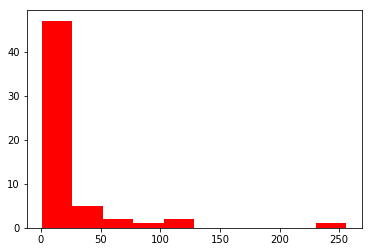

In [14]:
py.hist(dist, color='red')

In [15]:
pathway_dict['Cell engulfment_WP2226']

['ced-9',
 'ced-3',
 'ced-2',
 'psr-1',
 'ced-5',
 'ced-6',
 'egl-1',
 'ced-4',
 'ced-1',
 'ced-7',
 'ced-10']

## build gmt

In [16]:
filename = 'wikipathways_worm_%s.gmt'% str(datetime.date.today())[0:7].replace('-', '_')
file = open(filename,'w+') 
terms = pathway_dict.keys()
for i,term in enumerate(terms):
    
    progressPercent = ((i+1)/len(terms))*100
    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(terms)))
    sys.stdout.flush()
    
    if len(pathway_dict[term]) > 4:
        file.write("%s\t" % term)
        file.write("\t")
        genes = pathway_dict[term]
    
        for gene in genes:
              file.write("%s\t" % gene)
        file.write("\n")
        
file.close()

## get gmt stats

In [18]:
def getTermStats(loaded_gmt, geneInfoTable, num_samplings, num_genes_in_sampling) :
    # get the relevant terms and set a dictionary for them
    term_set = loaded_gmt.iloc[:,0].apply(lambda x: x.split("\t")[0])
    term_genes_dict = {term_set[i]: loaded_gmt.iloc[i,0].split("\t")[2:] for i in range(0, loaded_gmt.shape[0])}
    term_rank_dict = {k: [] for k in term_set}
    term_stats_dict = {k: [] for k in term_set}
    
    # get the total number of genes in the organism
    n_genes = len(geneInfoTable["Symbol"].unique())
    
    # number of genes per sampling, number of times to sample
    genes_in_sampleing = num_genes_in_sampling
    num_samplings = num_samplings
    
    for i,x in enumerate(range(0,num_samplings)):
        
        progressPercent = ((i+1)/len(range(0,num_samplings)))*100
        
        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(range(0,num_samplings))))
        sys.stdout.flush()
            
        
        randomSet = set(geneInfoTable["Symbol"].sample(genes_in_sampleing))
        
        # initialize an array to hold the pvalue for each term
        pvals = np.array([])
        for key in term_rank_dict.keys():
            
            termSet = set(term_genes_dict[key])
            # calculate p value using fisher exact test
            # implemented using the formula found in the GeneOverap bioconductor package for R
            pval_term = stat.fisher_exact([[n_genes - len(termSet.union(randomSet)), len(randomSet.difference(termSet))], [len(termSet.difference(randomSet)), len(termSet.intersection(randomSet))]])[1]
            pvals = np.append(pvals, [pval_term])
        
        # sort the pvals and add the rank to the term_rank dict
        sorted_pvals = pvals.argsort()
        
        # find the rank for each term by sorting the pvals array and getting the index of the key position in the
        # sorted list. Need to +1 because the index begins with 0
        
        for j,key in enumerate(term_rank_dict.keys()):
            term_rank_dict[key].append(np.where(sorted_pvals == j)[0][0] + 1)
            
    for key in term_rank_dict:
        term_stats_dict[key] = [np.mean(term_rank_dict[key]), np.std(term_rank_dict[key])]
            
    
    
    return term_stats_dict

In [19]:
## load gmt
wikipathway_gmt = pd.read_csv("wikipathways_greater4_2018_07.gmt", sep="~", header=None)

In [20]:
wikipathway_gmt.head()

,0
0,Cell engulfment_WP2226\t\tced-9\tced-3\tced-2\...
1,Proteasome Degradation_WP470\t\trpn-3\tpbs-3\t...
2,"Valine, leucine and isoleucine degradation_WP1..."
3,Triacylglyceride Synthesis_WP212\t\tacl-2\tgly...
4,Fatty Acid Biosynthesis_WP38\t\tacly-1\tF54C8....


In [21]:
iterations_200 = getTermStats(wikipathway_gmt, cElegans_proteinCoding, num_samplings=200, num_genes_in_sampling=300)

In [22]:
df_200_iterations = pd.DataFrame.from_dict(iterations_200, orient='index', columns = ['mean', 'sd'])
df_200_iterations.to_csv('output/wikipathways_worm_2018_07_stats.tsv', sep='\t', header=False)